<a href="https://colab.research.google.com/github/nupoor-ka/23110224_A1/blob/master/score_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

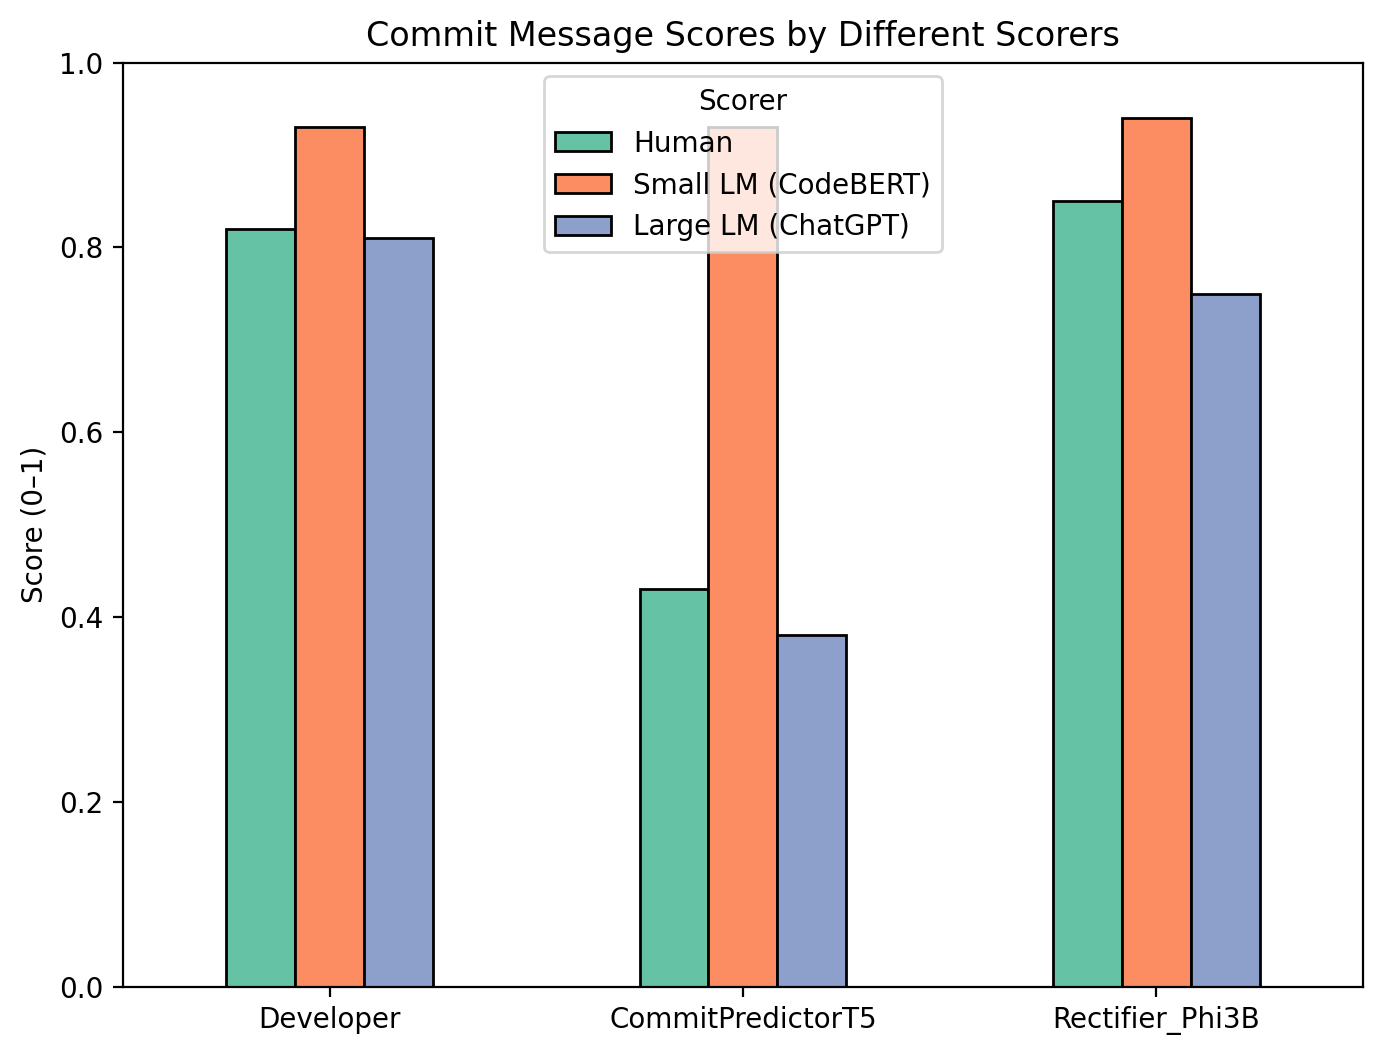

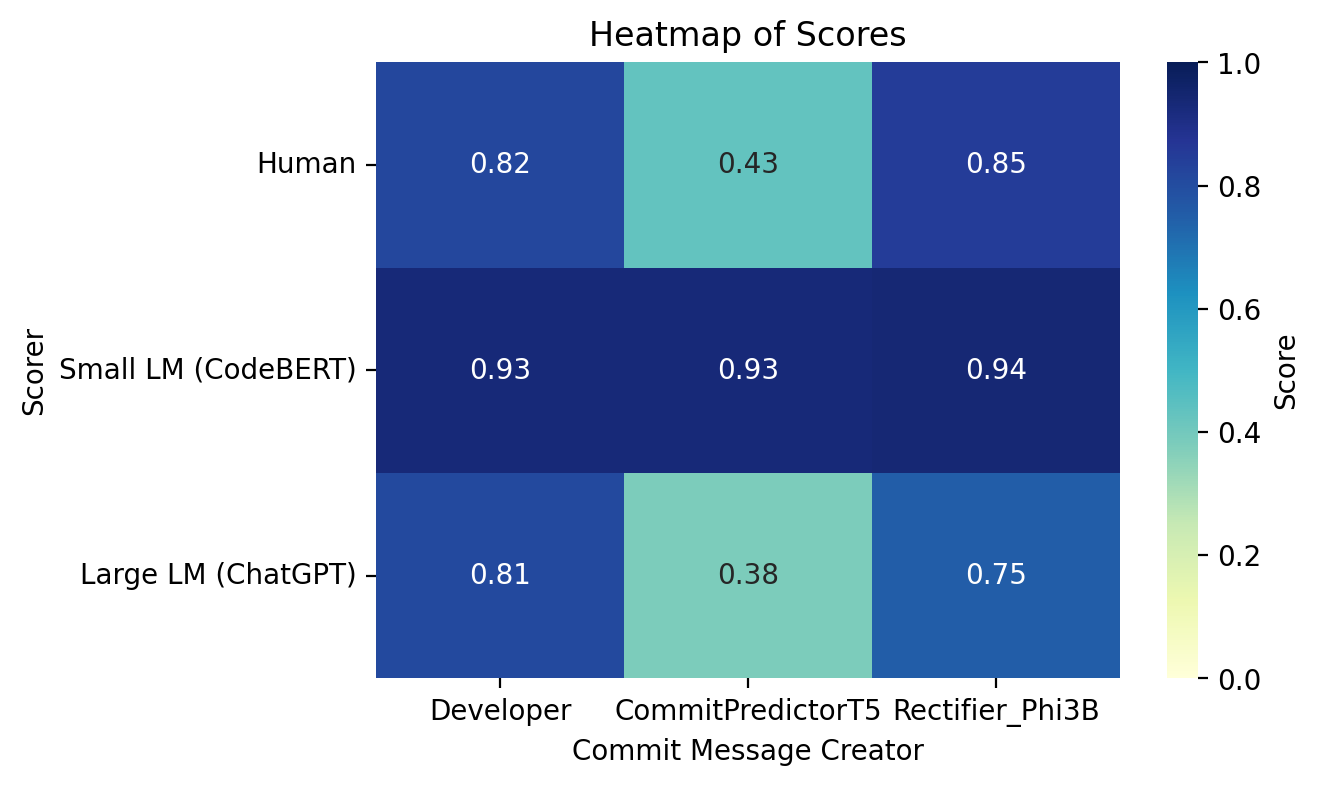

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'

scores = {
    "Developer": [0.82,0.93,0.81],   # scored by Human, CodeBERT, ChatGPT
    "CommitPredictorT5": [0.43, 0.93, 0.38],
    "Rectifier_Phi3B": [0.85, 0.94, 0.75]
}

scorers = ["Human", "Small LM (CodeBERT)", "Large LM (ChatGPT)"]
df = pd.DataFrame(scores, index=scorers)
palette = sns.color_palette("Set2", n_colors=len(scorers))  # to get better colours
ax = df.T.plot(kind="bar", figsize=(8,6), color=palette, edgecolor="black")
plt.title("Commit Message Scores by Different Scorers") # grouped bar
plt.ylabel("Score (0–1)")
plt.xticks(rotation=0)
plt.legend(title="Scorer")
plt.ylim(0,1)
plt.show()
plt.figure(figsize=(6,4)) # heatmap
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=0, vmax=1, cbar_kws={'label': 'Score'})
plt.title("Heatmap of Scores")
plt.ylabel("Scorer")
plt.xlabel("Commit Message Creator")
plt.show()

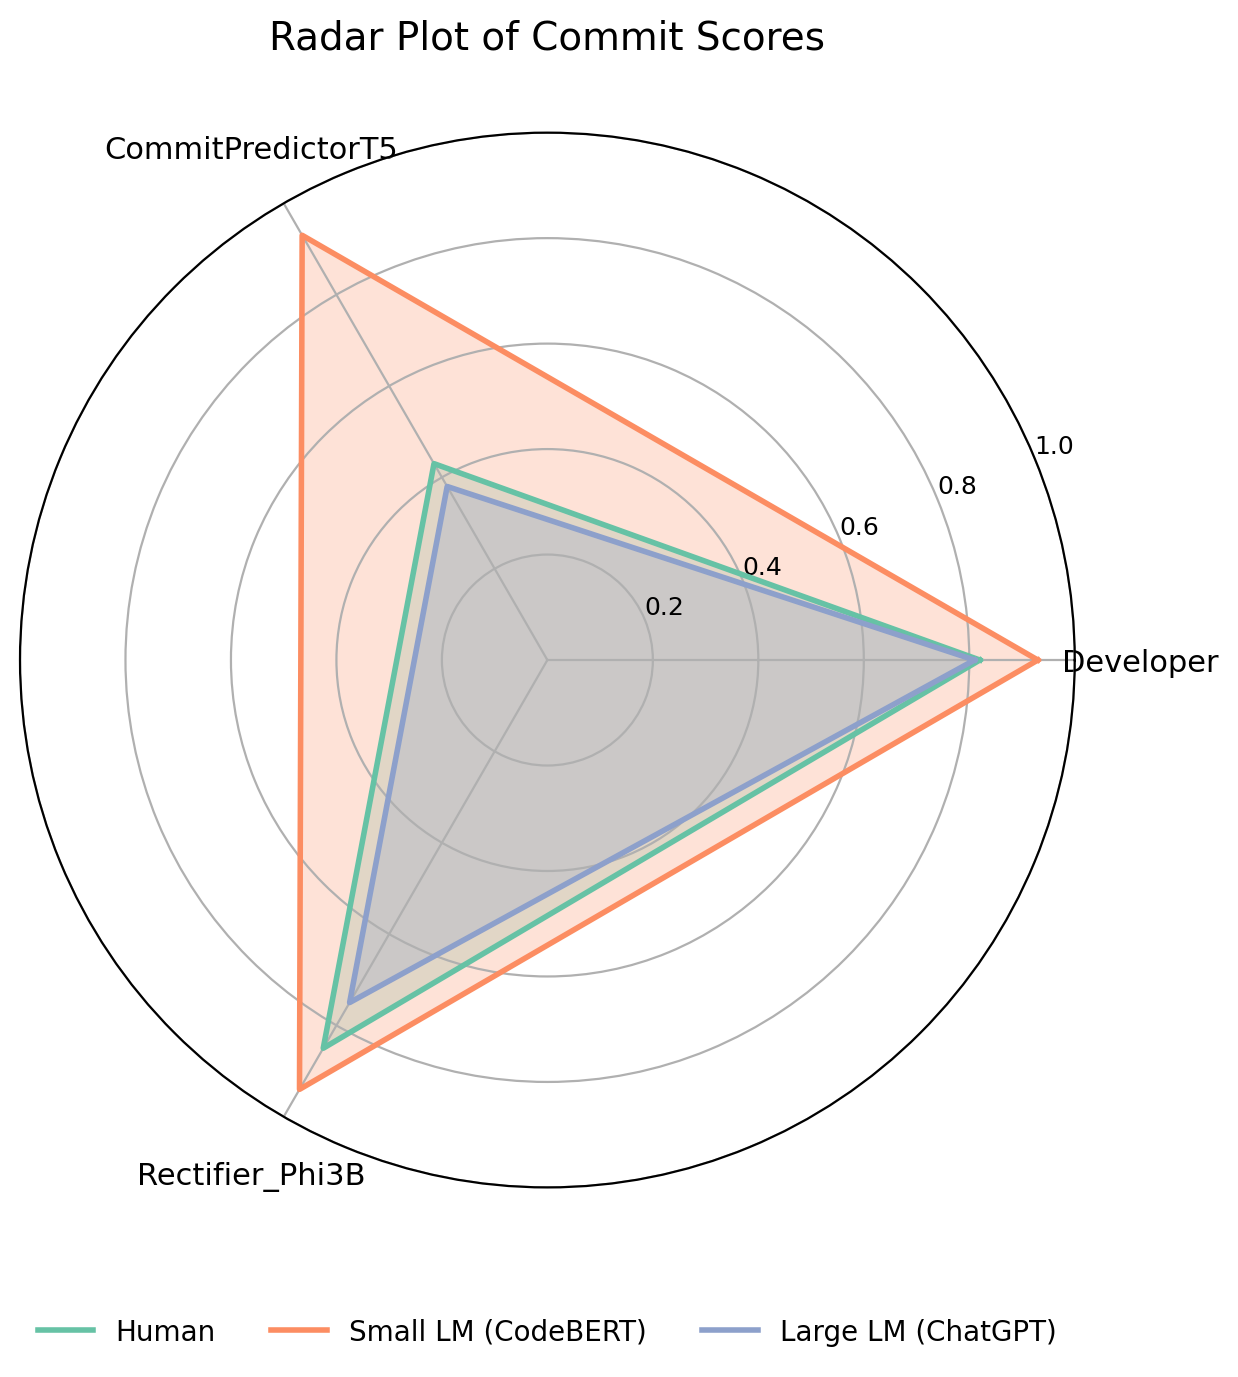

In [17]:
creators = list(scores.keys())
data = np.array([scores[c] for c in creators]).T
N = len(creators)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))
colors = plt.cm.Set2.colors
for i, scorer in enumerate(scorers):
    values = data[i].tolist()
    values += values[:1]  # close the polygon
    ax.plot(angles, values, label=scorer, color=colors[i], linewidth=2)
    ax.fill(angles, values, color=colors[i], alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(creators, fontsize=11)
for label in ax.get_xticklabels(): # labels weren't working so, moved them out a bit
    label.set_horizontalalignment("center")
    label.set_verticalalignment("center_baseline")
    label.set_y(label.get_position()[1] - 0.05)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["0.2","0.4","0.6","0.8","1.0"], fontsize=9)
ax.set_ylim(0,1)
plt.title("Radar Plot of Commit Scores", size=14, pad=30) # padding to avoid overlap
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)
plt.tight_layout()
plt.show()